En este notebook se crearám las gráficas para incluir en el documento de texto de la tesis.

## Gráficas de una serie de tiempo sin limpiar

In [1]:
import os
from pathlib import PurePath
#from plot_utils.charts import time_series, precipitation_plot
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
root = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\datos\model_predicts\zafra2022\ndvi_mean"
img_root = r"C:\Users\Isai\Documents\Tesis\code\revision\img\2022"

## Serie de tiempo ndvi

In [110]:
p5_path = r"C:\Users\Isai\Documents\Tesis\code\datos\parcelas\ready_to_analyze\zafra2022\parcela_11.csv"
df5 = pd.read_csv(p5_path)
df5['Fecha'] = pd.to_datetime(df5['Fecha'])
df5 = df5.sort_values(by='Fecha', ascending=True)

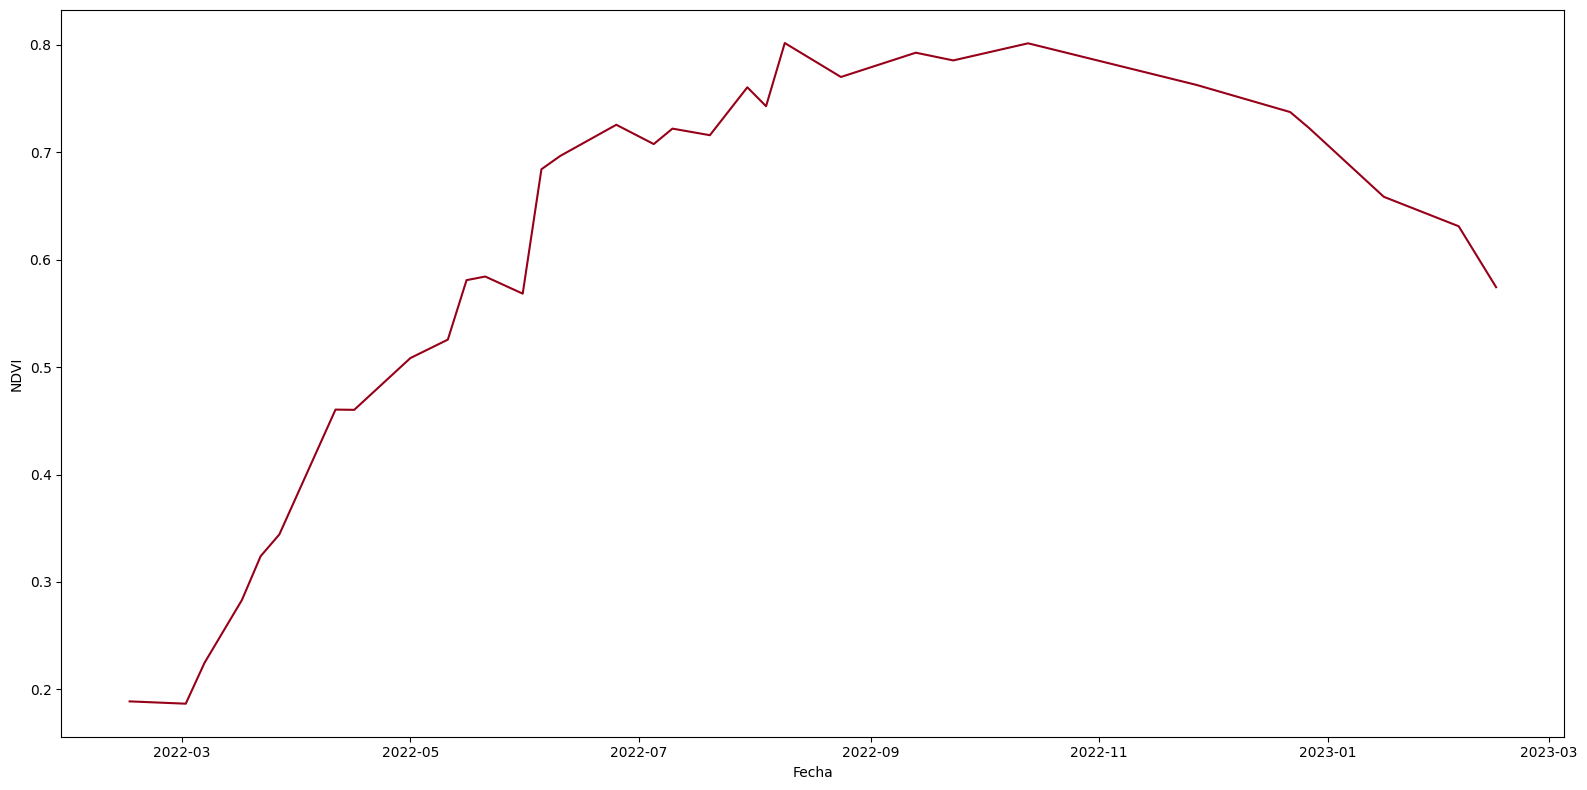

In [111]:
plt.figure(figsize=(16, 8))
plt.plot(df5['Fecha'], df5['ndvi_mean'], color=(150/255, 0, 24/255))
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.tight_layout()
#plt.savefig('C:/Users/Isai/Documents/Tesis/code/tesis_img/raw_ts/parcela_5_ndvi.png', dpi=100)
plt.show()

In [19]:
modelados_files = [(pd.read_csv(PurePath(root, file), parse_dates=True),int(file.split('.')[0].split('_')[1])) for file in os.listdir(root) if file.endswith(".csv")]

In [ ]:
var = 'msi_mean'
for i in modelados_files:
    fig, ax = plt.subplots(figsize=(12,6))
    plt.plot(pd.to_datetime(i[0]['Fecha']), i[0][var], color='royalblue', lw = 1)
    ax.set_ylabel(f'{var.split('_')[0].upper()}')
    ax.set_xlabel('Fecha')
    plt.title(f"Parcela {i[1]}")
    plt.tight_layout()
    dest_path = PurePath(img_root, f'{var}')
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    plt.savefig(PurePath(dest_path, f"parcela_{i[1]}.png"))

## Series de tiempo climaticas

In [35]:
ds = pd.read_csv(r"C:/Users/Isai/Documents/Tesis/code/datos/parcelas/indices_stats/parcela_7.csv", parse_dates=True)
ds2 = pd.read_csv(r"C:/Users/Isai/Documents/Tesis/code/datos/parcelas/ready_to_analyze/zafra2021/parcela_7.csv", parse_dates=True)
ds3 = pd.read_csv(r"C:/Users/Isai/Documents/Tesis/code/datos/parcelas/ready_to_analyze/zafra2022/parcela_7.csv", parse_dates=True)
ds['Fecha'] = pd.to_datetime(ds['Fecha'])
ds2['Fecha'] = pd.to_datetime(ds2['Fecha'])
ds3['Fecha'] = pd.to_datetime(ds3['Fecha'])
ds = ds.sort_values(by='Fecha', ascending=True)

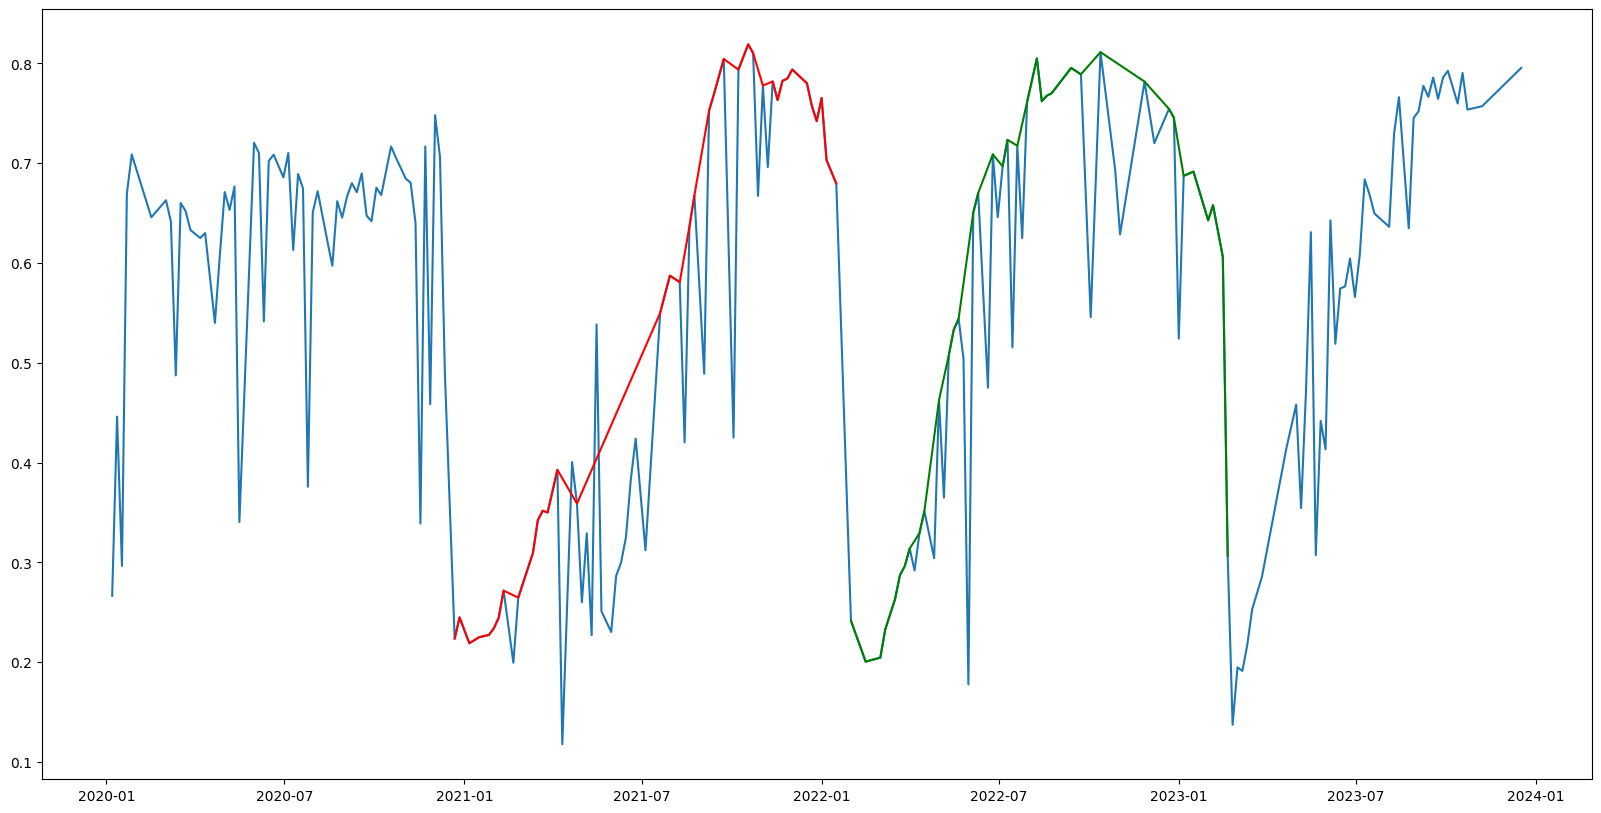

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(ds['Fecha'], ds['ndvi_mean'])
plt.plot(ds2['Fecha'], ds2['ndvi_mean'], color='r')
plt.plot(ds3['Fecha'], ds3['ndvi_mean'], color='g')
plt.show()

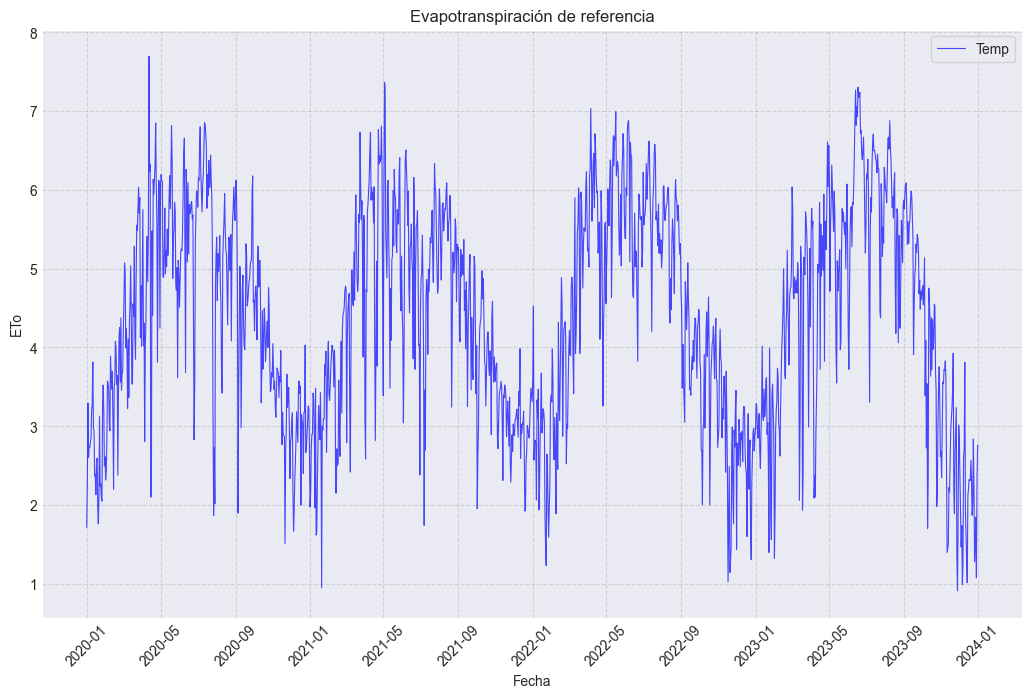

True

In [10]:
precipitation_plot(ds, 'Fecha', 'et', 'Evapotranspiración de referencia', x_label='Fecha', y_label='ETo', legend='Temp', export=True, export_path=r'C:\Users\Isai\Documents\Tesis\code\imagenes_tesis\eto_par5')

## Ambas zafras

In [2]:
z21 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\datos\model_predicts\zafra2021\ndvi_mean"
z22 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\datos\model_predicts\zafra2022\ndvi_mean"

In [3]:
dfs1 = [pd.read_csv(PurePath(z21, f), parse_dates=True) for f in os.listdir(z21) if f.endswith(".csv")]
dfs2 = [pd.read_csv(PurePath(z22, f), parse_dates=True) for f in os.listdir(z22) if f.endswith(".csv")]

In [4]:
to_concat_21 = []
for i in dfs1:
    i['Fecha'] = pd.to_datetime(i['Fecha'])
    to_concat_21.append(i)
    
df_21 = pd.concat(to_concat_21, ignore_index=True, axis=0)

In [5]:
to_concat_22 = []
for i in dfs2:
    i['Fecha'] = pd.to_datetime(i['Fecha'])
    to_concat_22.append(i)
    
df_22= pd.concat(to_concat_22, ignore_index=True, axis=0)

In [6]:
df_juntos = pd.concat([df_21, df_22], ignore_index=True, axis=0)

In [7]:
df_juntos

,Id,Fecha,Parcela,ndvi_mean,ndvi_min,ndvi_max,ndmi_mean,ndmi_min,ndmi_max,msi_mean,...,grndvi_mean,grndvi_min,grndvi_max,dia,ndvi_mean_pred_1,ndvi_mean_pred_2,ndvi_mean_pred_3,ndvi_mean_pred_4,ndvi_mean_pred_5,ndvi_mean_pred_6
0,60,2020-11-22,1,0.305996,0.205660,0.660984,-0.153080,-0.247706,0.071900,1.378226,...,6826.085404,4655.394483,8536.907353,1,0.328693,0.186576,0.267989,0.312630,0.331455,0.019175
1,58,2020-11-27,1,0.278578,0.174046,0.625000,-0.185968,-0.271810,0.062327,1.481808,...,5948.449091,4288.266370,7250.830042,6,0.332695,0.201578,0.269982,0.302128,0.312883,0.099647
2,59,2020-12-02,1,0.298791,0.178760,0.685349,-0.189587,-0.281839,0.094161,1.495535,...,5475.322627,3933.448738,7030.885749,11,0.336696,0.216325,0.272463,0.293398,0.297400,0.164904
3,46,2020-12-12,1,0.281617,0.174553,0.619590,-0.191848,-0.327252,0.054252,1.498835,...,5587.923788,3935.803013,7110.850060,21,0.344699,0.245052,0.278821,0.280920,0.274902,0.257496
4,49,2020-12-22,1,0.292072,0.179788,0.649919,-0.161185,-0.294198,0.090274,1.404931,...,5896.911165,4237.823922,7382.864662,31,0.352702,0.272757,0.286928,0.274550,0.262432,0.310841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,156,2023-03-12,9,0.587173,0.471816,0.651751,0.159885,0.053326,0.243075,0.726168,...,4764.863913,4422.363064,5131.492362,296,0.662865,0.628336,0.597825,0.588334,0.593104,0.590650
1286,158,2023-03-17,9,0.638120,0.540070,0.703027,0.176251,0.069938,0.258488,0.701942,...,4853.442310,4392.461835,5283.567245,301,0.668196,0.612444,0.588002,0.578706,0.584561,0.579886
1287,164,2023-03-27,9,0.532089,0.463789,0.589443,0.106782,0.021158,0.169383,0.808255,...,5027.056099,4745.345188,5403.281170,311,0.678860,0.578190,0.568916,0.561120,0.568315,0.559757
1288,155,2023-04-21,9,0.511366,0.459095,0.561023,0.076120,0.007184,0.121164,0.859226,...,5235.368302,5060.299395,5537.229540,336,0.705520,0.478150,0.526381,0.530919,0.531932,0.526565


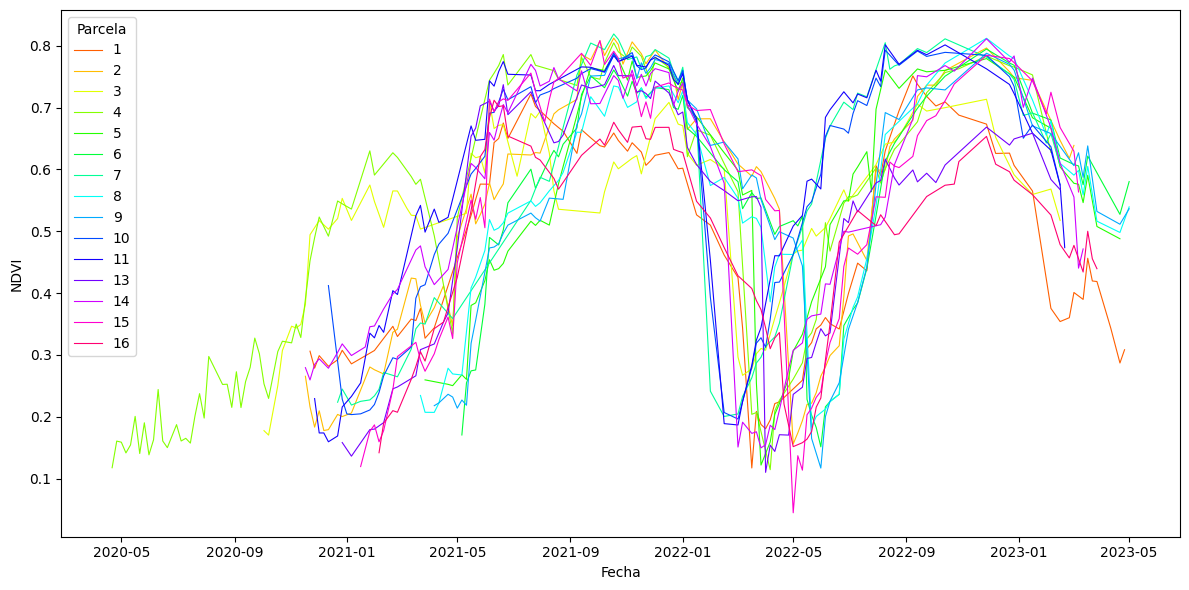

In [21]:
ids = df_juntos['Parcela'].unique()
palette = sns.color_palette('hsv', len(ids))
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_juntos, x='Fecha', y='ndvi_mean', hue='Parcela', palette=palette, lw=0.8, alpha=1)
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.tight_layout()
plt.savefig(PurePath(r"C:/Users/Isai/Documents/Tesis/code/tesis_img/sueltas", 'ndvi_mean.png'), dpi=100)
plt.show()

### Kc

In [2]:
zafra21 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2021"
zafra22 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2022"

In [3]:
allvars21 = [(pd.read_csv(PurePath(zafra21, file), parse_dates=True),int(file.split('.')[0].split('_')[1])) for file in os.listdir(zafra21) if file.endswith(".csv")]
allvars22 = [(pd.read_csv(PurePath(zafra22, file), parse_dates=True),int(file.split('.')[0].split('_')[1])) for file in os.listdir(zafra22) if file.endswith(".csv")]

In [47]:
allvars22[0][0]

,Parcela,Fecha,dias,ndvi,gndvi,cire,ndre1,ndmi,msi,temp,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,holtwinters_predicts,kc,etc,etc_acum
0,1,2022-03-17,1.0,0.088850,0.215722,1.877845,-0.015733,-0.358693,1.948709,301.27505,...,807,5.595593,4.545427,6.490142,4.545427,30.492860,17.545649,0.272178,1.766474,1.766474
1,1,2022-03-18,2.0,0.093880,0.218952,1.892872,-0.012295,-0.354588,1.938718,299.80554,...,808,5.564731,4.573862,12.699148,9.119289,20.146467,18.002065,0.277961,1.725864,3.492338
2,1,2022-03-19,3.0,0.098886,0.222168,1.907828,-0.008872,-0.350500,1.928769,296.99957,...,809,5.487040,4.602296,16.566232,13.721585,20.116510,24.608544,0.283719,1.097164,4.589503
3,1,2022-03-20,4.0,0.103869,0.225368,1.922714,-0.005465,-0.346430,1.918862,297.01495,...,810,5.401087,4.630723,20.797631,18.352309,40.824470,35.807988,0.289450,1.224778,5.814281
4,1,2022-03-21,5.0,0.108830,0.228554,1.937531,-0.002073,-0.342378,1.908997,299.97177,...,811,5.345158,4.659134,27.012791,23.011443,36.745070,33.216026,0.295155,1.834435,7.648716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,2023-04-22,402.0,0.282039,0.323255,2.285501,0.103977,-0.121796,1.303065,299.54395,...,1208,5.216756,5.469619,1862.998420,1855.037366,41.680930,45.320680,0.494345,2.548936,1309.281649
402,1,2023-04-23,403.0,0.277951,0.320546,2.272438,0.101120,-0.124737,1.309878,302.23267,...,1209,5.486806,5.493444,1869.567001,1860.530810,36.702682,36.140727,0.489643,3.216262,1312.497911
403,1,2023-04-24,404.0,0.273840,0.317822,2.259304,0.098247,-0.127696,1.316733,298.05120,...,1210,5.839269,5.516999,1874.141556,1866.047809,39.218390,36.390804,0.484916,2.218273,1314.716184
404,1,2023-04-25,405.0,0.269706,0.315084,2.246101,0.095358,-0.130672,1.323629,299.40564,...,1211,6.181927,5.540278,1880.258729,1871.588088,42.698395,38.742612,0.480162,2.937233,1317.653417


In [6]:
zafra_21 = []
for i in allvars21:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    zafra_21.append(i[0])
    
zafra_df_21 = pd.concat(zafra_21, ignore_index=True, axis=0)

In [10]:
zafra_22 = []
for i in allvars22:
    i[0]['Fecha'] = pd.to_datetime(i[0]['Fecha'])
    zafra_22.append(i[0])
    
zafra_df_22 = pd.concat(zafra_22, ignore_index=True, axis=0)

In [7]:
zafra_df_21

,Parcela,Fecha,dias,ndvi,gndvi,cire,ndre1,ndmi,msi,temp,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,holtwinters_predicts,kc,etc,etc_acum
0,1,2020-11-22,1.0,0.189597,0.333005,2.031973,0.030091,-0.256642,1.612758,297.91467,...,327,2.893827,3.039061,2.907834,3.039061,48.245804,54.686762,0.388036,1.128346,1.128346
1,1,2020-11-23,2.0,0.192608,0.334534,2.042438,0.032388,-0.254263,1.607599,297.06143,...,328,3.072525,3.028533,6.008959,6.067594,42.719746,45.511135,0.391499,1.214086,2.342432
2,1,2020-11-24,3.0,0.195608,0.336057,2.052866,0.034676,-0.251890,1.602456,297.28204,...,329,3.231411,3.018459,9.878226,9.086052,42.058414,45.211345,0.394949,1.528164,3.870596
3,1,2020-11-25,4.0,0.198598,0.337575,2.063255,0.036957,-0.249525,1.597328,298.20642,...,330,3.340968,3.008841,13.341425,12.094894,55.122986,49.617785,0.398388,1.379697,5.250293
4,1,2020-11-26,5.0,0.201578,0.339087,2.073606,0.039229,-0.247167,1.592217,299.41553,...,331,3.387013,2.999684,16.843239,15.094578,52.121250,52.448938,0.401815,1.407082,6.657375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6735,9,2022-05-12,402.0,0.375281,0.388536,2.382389,0.142038,0.068622,0.895105,303.09985,...,863,5.905146,5.592020,1789.065560,1789.341133,46.220257,61.603290,0.601573,3.829949,1433.868215
6736,9,2022-05-13,403.0,0.371079,0.385823,2.364140,0.138754,0.066199,0.899212,303.25998,...,864,6.156752,5.607846,1795.752752,1794.948979,41.085690,50.498356,0.596740,3.990517,1437.858732
6737,9,2022-05-14,404.0,0.366853,0.383095,2.345794,0.135452,0.063759,0.903346,302.59268,...,865,6.443887,5.623309,1802.055497,1800.572287,42.699590,45.625866,0.591881,3.730474,1441.589206
6738,9,2022-05-15,405.0,0.362603,0.380351,2.327350,0.132131,0.061304,0.907508,302.96564,...,866,6.694115,5.638403,1808.725306,1806.210691,38.872124,38.655033,0.586994,3.915136,1445.504342


In [43]:
zafra21_dias = zafra_df_21.groupby('Parcela')['dias'].max()
zafra22_dias = zafra_df_22.groupby('Parcela')['dias'].max()

In [37]:
zafras_dias = pd.merge(zafra21_dias, zafra22_dias, left_on='Parcela', right_on='Parcela', how='left')

In [55]:
zafras_dias['diff'] = abs(zafras_dias['dias_x'] - zafras_dias['dias_y'])
zafras_dias

,dias_x,dias_y,diff
Parcela,,,
1,471.0,406.0,65.0
2,516.0,306.0,210.0
3,506.0,351.0,155.0
4,681.0,326.0,355.0
5,356.0,396.0,40.0
6,371.0,351.0,20.0
7,391.0,386.0,5.0
8,421.0,346.0,75.0
9,406.0,346.0,60.0


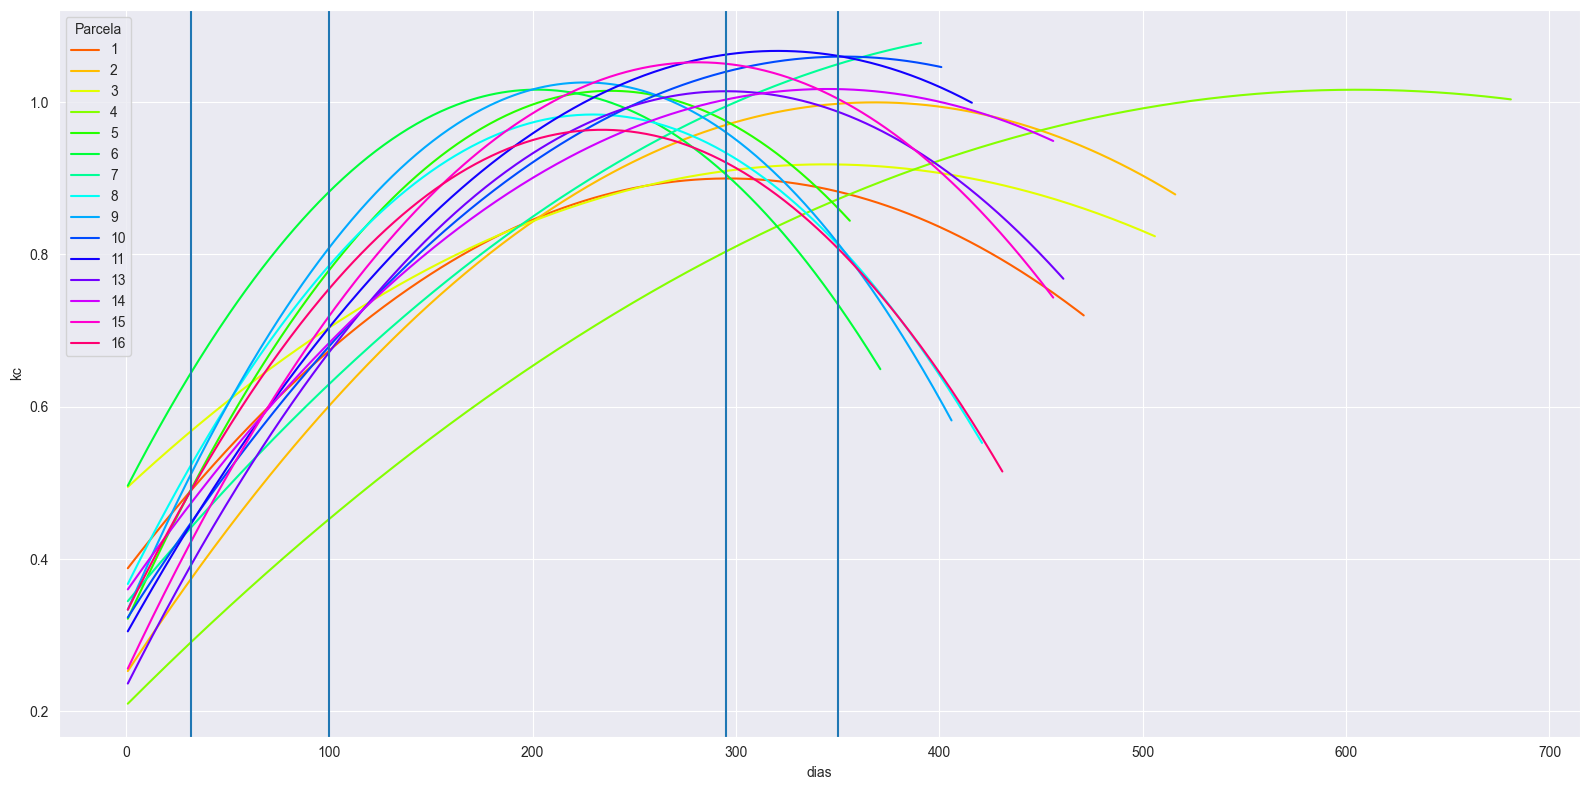

In [52]:
ids = zafra_df_21['Parcela'].unique()
palette = sns.color_palette('hsv', len(ids))
plt.figure(figsize=(16, 8))
sns.lineplot(data=zafra_df_21, x='dias', y='kc', hue='Parcela', palette=palette)
plt.axvline(x=32)
plt.axvline(x=100)
plt.axvline(x=295)
plt.axvline(350)
plt.tight_layout()
plt.savefig(PurePath(r"", 'kc_22_dias.png'), dpi=200)
plt.show()

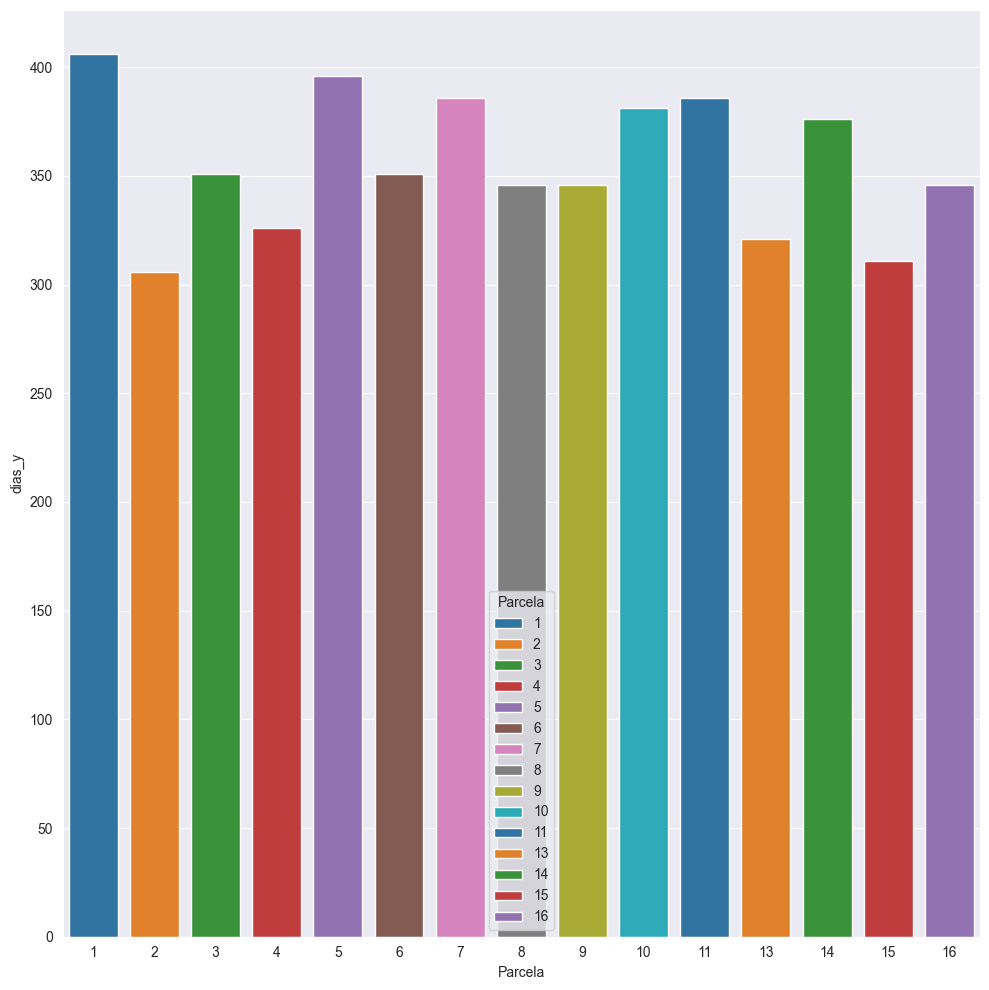

In [35]:

plt.figure(figsize=(10, 10))
sns.barplot(data=zafras_dias, x='Parcela', y='dias_y', palette='tab10', hue='Parcela')
plt.tight_layout()
plt.savefig(PurePath(r"C:\Users\Isai\Documents\Tesis\code\revision\img\juntos", 'dias_zafra_22.png'), dpi=200)
plt.show()